In [ ]:
#conda install geopandas

In [ ]:
#import geopandas as gpd


In [ ]:
#street_map = gpd.read_file(UofT_GroupAssignment/cnty24k09_1_line.shp)

#fig.ax = plt.subplots(figsize = (15,15))
#street_map.plot(ax = ax)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
url="https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
housing = pd.read_csv(url)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Text(0.5, 1.0, 'Distribution of households')

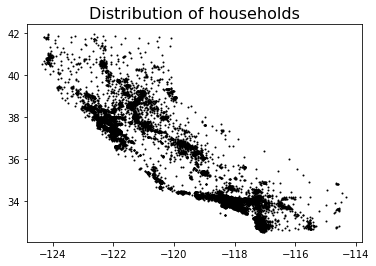

In [3]:
#Bonnie
#This is like Assignment one, where the coordinates are within a 'square' or part of 'california'. I am working to overlay a map over the
#scatterplots and then mapping population density and housing prices to the major cities within california.
x = housing['longitude']
y = housing['latitude']

plt.plot(x, y, 'o', color = 'black', markersize = 1);
plt.title("Distribution of households", size = 16)

<Figure size 720x504 with 0 Axes>

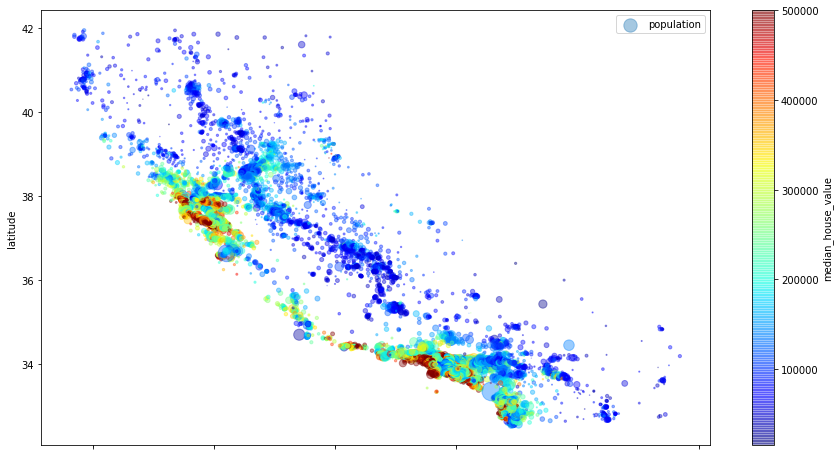

In [4]:
plt.figure(figsize=(10,7))
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=housing["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
    )
plt.legend()

House price seems related to the ocean proximity and to the density of the population.

In [5]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Text(0.5, 0, 'Count')

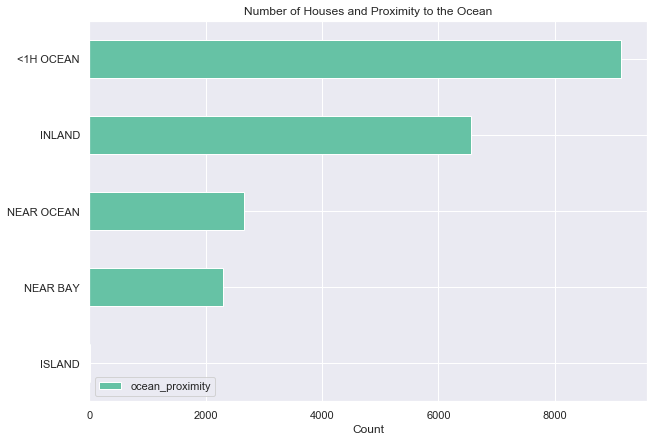

In [7]:
sns.set(palette='Set2')
housing.ocean_proximity.value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(10,7))
plt.legend()
plt.title('Number of Houses and Proximity to the Ocean')
plt.xlabel('Count')

This counts the number of entries in the ocean proximity category

In [8]:
prices_by_proximity = housing.pivot_table('median_house_value', index = 'ocean_proximity', aggfunc = np.median)
prices_by_proximity

,median_house_value
ocean_proximity,
<1H OCEAN,214850.0
INLAND,108500.0
ISLAND,414700.0
NEAR BAY,233800.0
NEAR OCEAN,229450.0


In [9]:
import geopy.distance

x = housing['longtitude']
y = housing['latitude']

print geopy.distance.vincenty(x,y).km


SyntaxError: invalid syntax (<ipython-input-9-74d74350c11e>, line 5)

In [ ]:
Major_cities = {("-121.47" , "38.57") : "Sacramento", \
               ("-122.69" , "34.29") : "San_Francisco",\
               ("-121.85" , "37.3") : "San_Jose", \
               ("-118.41" , "34.11") : "Los_Angeles", \
               ("-117.13" , "32.82") : "San_Diego", \
               }

In [10]:
from geopy.distance import geodesic

origin = (38.57, -121.47)  # (latitude, longitude) don't confuse
dist = (housing['latitude'], housing['longitude'])

print(geodesic(origin, dist).meters)  # 23576.805481751613
print(geodesic(origin, dist).kilometers)  # 23.576805481751613
print(geodesic(origin, dist).miles)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
x = vincenty(KEY 1, key)
x
print(x)

In [ ]:
city_coords = {}
for dat in housing.iterrows():
    row = dat[1]
    city_coords[row['Name']] = (float(row['latitude']), float(row['longitude']))

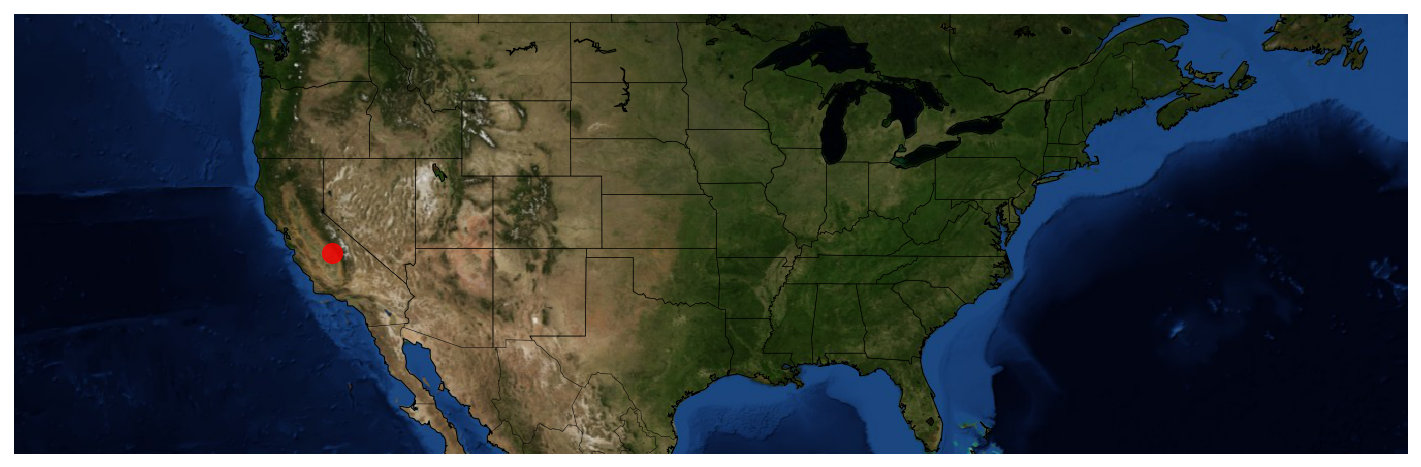

In [11]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=25,urcrnrlat=49.5,\
            llcrnrlon=-140,urcrnrlon=-50,resolution='l')

plt.figure(figsize=(25,17))
m.drawcountries() 
m.drawstates()  
m.drawcoastlines()
x,y = m(-119.4179,36.7783)
m.plot(x, y, 'ro', markersize=20, alpha=.8) 
m.bluemarble() 
m.drawmapboundary(color = '#FFFFFF')
plt.show()

In [14]:
import folium
from folium.plugins import HeatMap
map_hooray = folium.Map(location=[36.7783,-119.4179],
                    zoom_start = 6, min_zoom=5) 

df = housing[['latitude', 'longitude']]
data = [[row['latitude'],row['longitude']] for index, row in df.iterrows()]
HeatMap(data, radius=10).add_to(map_hooray)
map_hooray